# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this Project, I have decided to analyze the Soccer Database.
The data base contains:
>> 25979 matches

>>11060 players

>>11 European Countries and the top league in each of the 11 countries.

>>These data are curated from 2008 to 2016 Season.

>From Kaggle.com where this database is was downloaded from, the owners claim that Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

## Questions
> In this project I will focus more on the players and their attributes, I will be investigating the main qualities of the best players in Europe, and give detailed analysi on what impacts their overall ratings.

> I will be answering the following questions:

>> Which player have the higherst overall rating

>> Top 10 most rated players

>> Who are the fastes players

>> and more bonus questions...

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd 
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted

In [2]:
#function to display every data in a table

pd.set_option("display.max_columns", None)

In [3]:
#create an sql connection with the sqlite db using sqlite3 library

con = sqlite3.connect('esd.sqlite')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data

# df_1 = pd.read_sql_query("SELECT * FROM Player", con)
# df_2 = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df_1 = pd.read_csv('Database_Soccer/Player.csv')
df_2 = pd.read_csv('Database_Soccer/Player_Attributes.csv')

### Checking the number of Rows, Columns and Data types for each row
> In the next 

In [5]:
df_1.shape

(11060, 7)

In [6]:
df_2.shape

(183978, 42)

### Duplicate the dataframes so I don't modify the original. This copy is what will be used and analyzed in this project

In [7]:
# Create a copy of each dataframe

players_ = df_1.copy()
pl_stats_ = df_2.copy()

In [8]:
players_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [9]:
pl_stats_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

### Data cleaning 
> In this section is where I will remove all all the rows that will not be used in this analysis, format my data, merge table and create new cateogries based on the data

In [10]:
pl_stats_.columns.values

array(['id', 'player_fifa_api_id', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility',
       'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes'], dtype=object)

In [11]:
'''Based on questions I will be answering in this project, I will only keep columns that 
contain data that are useful in answering those questions.'''

players = players_.drop(['id', 'player_fifa_api_id','birthday'], axis=1)
pl_stats = pl_stats_.drop(['id', 'player_fifa_api_id', 'date', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control','acceleration', 'agility',
       'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes'], axis=1)

> Extracting the English Teams and their data for home and away matches

### Merging the Players to their Attributes from the Pl_stats Data frame and categorizing their key attributes

In [12]:
'''Grouping the Player Attributes data frame by the player id. This is because the data 
collected have attributes for every match a player played in during the duration the data was gathered
so I will collecting the mean of each player attribues'''

pl_att = pl_stats.groupby('player_api_id', as_index=False).mean()

# Merging Players to their attributes

players = players.merge(pl_att, on='player_api_id')

# Drop unused columns
players = players.drop(['player_api_id'],axis=1)

In [13]:
players.head()

,player_name,height,weight,overall_rating,sprint_speed
0,Aaron Appindangoye,182.88,187,63.600000,64.000000
1,Aaron Cresswell,170.18,146,66.969697,74.939394
2,Aaron Doran,170.18,163,67.000000,77.500000
3,Aaron Galindo,182.88,198,69.086957,52.826087
4,Aaron Hughes,182.88,154,73.240000,54.080000


In [14]:
# Categorize the weight of each player

weight_bin = [117,159,168,179,243]
weight_name = ['light','average','muscular','heavey']
players['weight_cat'] = pd.cut(players['weight'], weight_bin, labels=weight_name)
players.head()

,player_name,height,weight,overall_rating,sprint_speed,weight_cat
0,Aaron Appindangoye,182.88,187,63.600000,64.000000,heavey
1,Aaron Cresswell,170.18,146,66.969697,74.939394,light
2,Aaron Doran,170.18,163,67.000000,77.500000,average
3,Aaron Galindo,182.88,198,69.086957,52.826087,heavey
4,Aaron Hughes,182.88,154,73.240000,54.080000,light


In [15]:
speed_bin = [17,61,75,88,96]
speed_name = ['slow','average','fast','bolt']
players['speed_cat'] = pd.cut(players['sprint_speed'], speed_bin, labels=speed_name)
players.head()

,player_name,height,weight,overall_rating,sprint_speed,weight_cat,speed_cat
0,Aaron Appindangoye,182.88,187,63.600000,64.000000,heavey,average
1,Aaron Cresswell,170.18,146,66.969697,74.939394,light,average
2,Aaron Doran,170.18,163,67.000000,77.500000,average,fast
3,Aaron Galindo,182.88,198,69.086957,52.826087,heavey,slow
4,Aaron Hughes,182.88,154,73.240000,54.080000,light,slow


In [16]:
height_bin = [157.48,182.88,185.42,208.28]
height_name = ['short','average','tall']
players['height_cat'] = pd.cut(players['height'], height_bin, labels=height_name)
players.head()

,player_name,height,weight,overall_rating,sprint_speed,weight_cat,speed_cat,height_cat
0,Aaron Appindangoye,182.88,187,63.600000,64.000000,heavey,average,short
1,Aaron Cresswell,170.18,146,66.969697,74.939394,light,average,short
2,Aaron Doran,170.18,163,67.000000,77.500000,average,fast,short
3,Aaron Galindo,182.88,198,69.086957,52.826087,heavey,slow,short
4,Aaron Hughes,182.88,154,73.240000,54.080000,light,slow,short


In [17]:
players.overall_rating.describe()

count    11060.000000
mean        66.821220
std          6.237737
min         43.000000
25%         62.822193
50%         66.722222
75%         70.951630
max         92.192308
Name: overall_rating, dtype: float64

In [18]:
rating_bin = [43,66,70,85,93]
rating_name = ['poor','average','good','world_class']
players['rating_cat'] = pd.cut(players['overall_rating'], rating_bin, labels=rating_name)
players.head()

,player_name,height,weight,overall_rating,sprint_speed,weight_cat,speed_cat,height_cat,rating_cat
0,Aaron Appindangoye,182.88,187,63.600000,64.000000,heavey,average,short,poor
1,Aaron Cresswell,170.18,146,66.969697,74.939394,light,average,short,average
2,Aaron Doran,170.18,163,67.000000,77.500000,average,fast,short,average
3,Aaron Galindo,182.88,198,69.086957,52.826087,heavey,slow,short,average
4,Aaron Hughes,182.88,154,73.240000,54.080000,light,slow,short,good


In [19]:
# Creating specific data frames for my analysis

player_height = players.iloc[:, 1:3]
player_height.height.describe()

count    11060.000000
mean       181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

In [20]:
player_speed = players.iloc[:,[0,1,5,6]]
player_speed.head()

,player_name,height,weight_cat,speed_cat
0,Aaron Appindangoye,182.88,heavey,average
1,Aaron Cresswell,170.18,light,average
2,Aaron Doran,170.18,average,fast
3,Aaron Galindo,182.88,heavey,slow
4,Aaron Hughes,182.88,light,slow


In [21]:
player_weight = players.iloc[:, [0,1,3]]
player_weight.head()

,player_name,height,overall_rating
0,Aaron Appindangoye,182.88,63.600000
1,Aaron Cresswell,170.18,66.969697
2,Aaron Doran,170.18,67.000000
3,Aaron Galindo,182.88,69.086957
4,Aaron Hughes,182.88,73.240000


<a id='eda'></a>
## Exploratory Data Analysis

### What are the Qualities of the Best Rated Players in Europe?

> Visualizing multidimentional relationships among the players data frames using Pair Plots.

>> You can find more information about this plot in the conclusion.


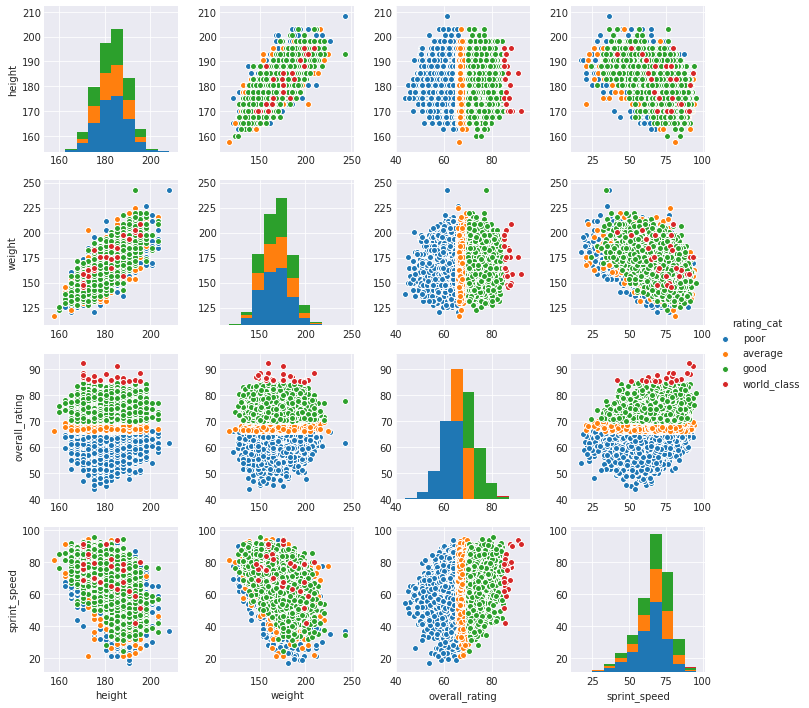

In [22]:
sns.pairplot(players, hue='rating_cat', size=2.5);

### Players Speed, Weight and Height Analysis

> What is the average overall rating for each height category. This is to know which height categories have a higher rating

In [23]:
def plot_param(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='both')
    plt.show()
    return None

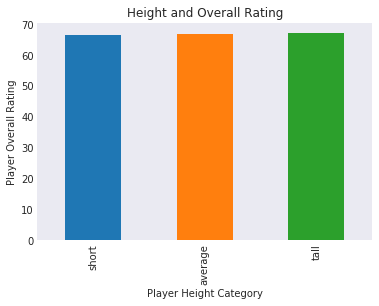

height_cat
short      66.674490
average    66.928964
tall       67.166524
Name: overall_rating, dtype: float64

In [24]:
# I will be using the group by function to answer this question
height_ = players.groupby(['height_cat'])['overall_rating'].mean()
height_.plot(kind= 'bar')
plot_param('Player Height Category','Player Overall Rating','Height and Overall Rating')
height_

>> This plot is used to visualize the average rating of each height category. Although it seem almost even, taller players have a slight advantage. Eg. ***Zlatan Ibrahimovic*** 💪🏼

> In the next bar graph, I will be analyzing the players speed categories to their overall rating. This is to know if speed affects a players overall rating.

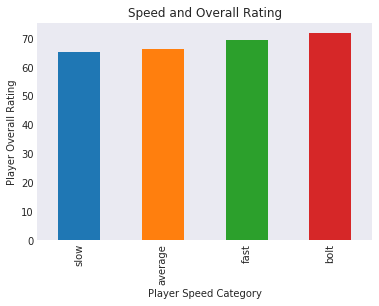

speed_cat
slow       65.517953
average    66.243508
fast       69.453639
bolt       71.828173
Name: overall_rating, dtype: float64

In [25]:
# I will be using the group by function to answer this question
speed_ = players.groupby(['speed_cat'])['overall_rating'].mean()
speed_.plot(kind= 'bar')
plot_param('Player Speed Category','Player Overall Rating','Speed and Overall Rating')
speed_

>> This bar graph is used to visualize the average rating of each players speed category. You can see from the graph that faster players tend to have higher rating Eg. ***Cristiano Ronaldo*** 🐐

> In the next bar graph, I will be analyzing the players weight categories and their overall rating. This is to know if a player's weight have any effect on their ratings.


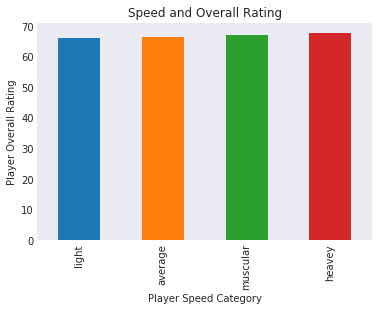

weight_cat
light       66.200690
average     66.488619
muscular    66.975473
heavey      67.800711
Name: overall_rating, dtype: float64

In [26]:
# I will be using the group by function to answer this question
weight_ = players.groupby(['weight_cat'])['overall_rating'].mean()
weight_.plot(kind= 'bar')
plot_param('Player Speed Category','Player Overall Rating','Speed and Overall Rating')
weight_

>> From the analysis above, the Light, Average and Muscular weight categories have almost similar ratings but the Heavy players have a slight advantage. Eg. ***Adebayo Akinfenwa*** 😀

> Using the seaborn factor plots, I will be ale to view the distribution of players category accross different speed categories


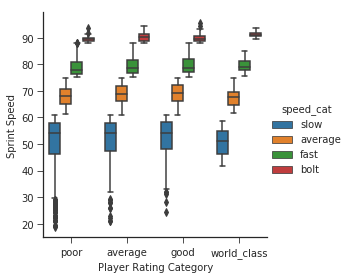

In [27]:
with sns.axes_style(style='ticks'):
    base = sns.factorplot('rating_cat', 'sprint_speed', 'speed_cat', data=players, kind='box')
    base.set_axis_labels('Player Rating Category', 'Sprint Speed');

### Top 10 Fastest Players

> Bar chart will be used to visualize this list of Top 10 Fastest Players in Europe and a table will be below for reference

> For this analysis, I will be using the sort_values funtion to sort by sprint speed in descending order.
> According to EA Sports FIFA, Sprint Speed is the maximum speed a player can accelerate to. For this peoject i had to drop the acceleration which is also important in deciding a player speed. However, acceleration is not important here because acceleration is the speed at which a player can reach their maximum speed. 

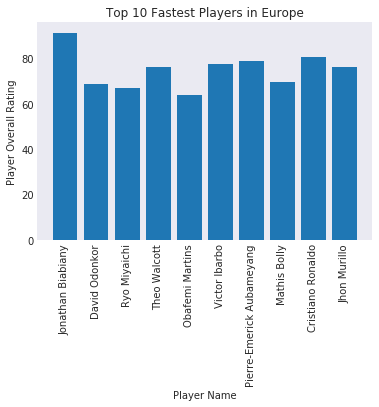

,player_name,sprint_speed,rating_cat
10161,Theo Walcott,95.696970,good
2396,David Odonkor,94.375000,average
10596,Victor Ibarbo,94.261905,good
1992,Cristiano Ronaldo,93.760000,world_class
9352,Ryo Miyaichi,93.680000,average
7101,Mathis Bolly,93.500000,poor
8611,Pierre-Emerick Aubameyang,93.441860,good
4922,Jhon Murillo,93.000000,average
5156,Jonathan Biabiany,92.517241,good
8067,Obafemi Martins,92.170213,good


In [28]:
fast_10 = players.sort_values(by='sprint_speed',ascending=False).head(10)
f10_label = fast_10['player_name'].unique()
plt.bar(f10_label, fast_10['overall_rating'])
plt.xticks(f10_label, rotation='vertical')
plot_param('Player Name','Player Overall Rating','Top 10 Fastest Players in Europe')
fast_10.iloc[0:,[0,4,8]]

### Top 10 most rated players

> ***I am saving the best for the last.***
> To Analyze the best players in Europe it is quite easy as, I just have to sort by maximum overall rating and print the top 10.

,player_name,rating_cat
6169,Lionel Messi,world_class
1992,Cristiano Ronaldo,world_class
3510,Franck Ribery,world_class
739,Andres Iniesta,world_class
11041,Zlatan Ibrahimovic,world_class
948,Arjen Robben,world_class
10845,Xavi Hernandez,world_class
10733,Wayne Rooney,world_class
4362,Iker Casillas,world_class
8587,Philipp Lahm,world_class


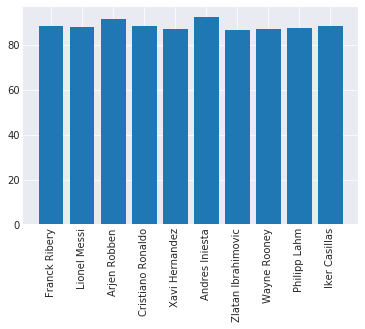

In [29]:
# To check this, I will have to use the sort_values funtion to sort by overall rating.
# Then plot it in a bar to show the top 10

top_10 = players.sort_values(by='overall_rating',ascending=False).head(10)
t10_label = top_10['player_name'].unique()
plt.bar(t10_label, top_10['overall_rating'])
plt.xticks(t10_label, rotation='vertical')
top_10.iloc[0:,[0,8]]

### Highest rated player in Europe

In [30]:
#Find the Max Overall Rating then use query to find the player

top_player = players['overall_rating'].max()
top_player

92.192307692307693

In [31]:
players[players['overall_rating'] == top_player].iloc[0:,[0,8]]


,player_name,rating_cat
6169,Lionel Messi,world_class


## What are the Qualities of the Best Rated Players in Europe?

> I will try to answer this question using a pair plot

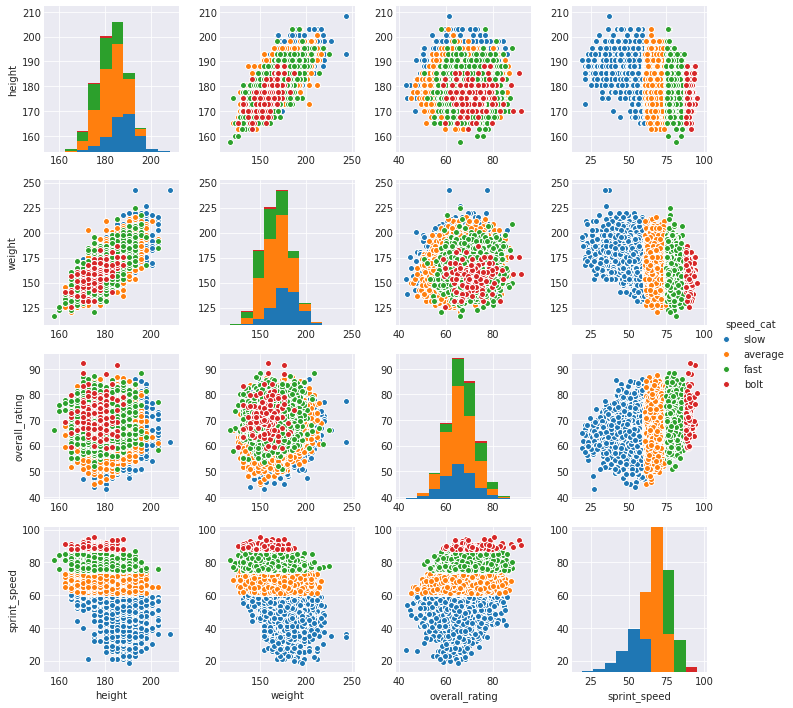

In [32]:
sns.pairplot(players, hue='speed_cat', size=2.5);

>> From the speed category pair plot, we can see that most slow players are heavy, have a low overall rating and are tall

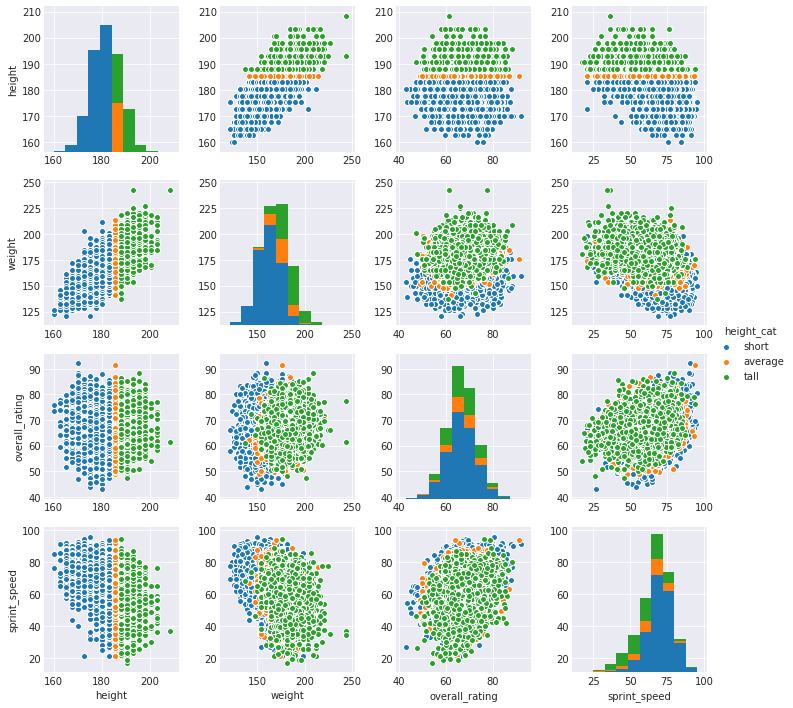

In [42]:
sns.pairplot(players, hue='height_cat', size=2.5);

>> From this height category pair plot, you can see that short players have are faster, lighter and have an average overall rating.

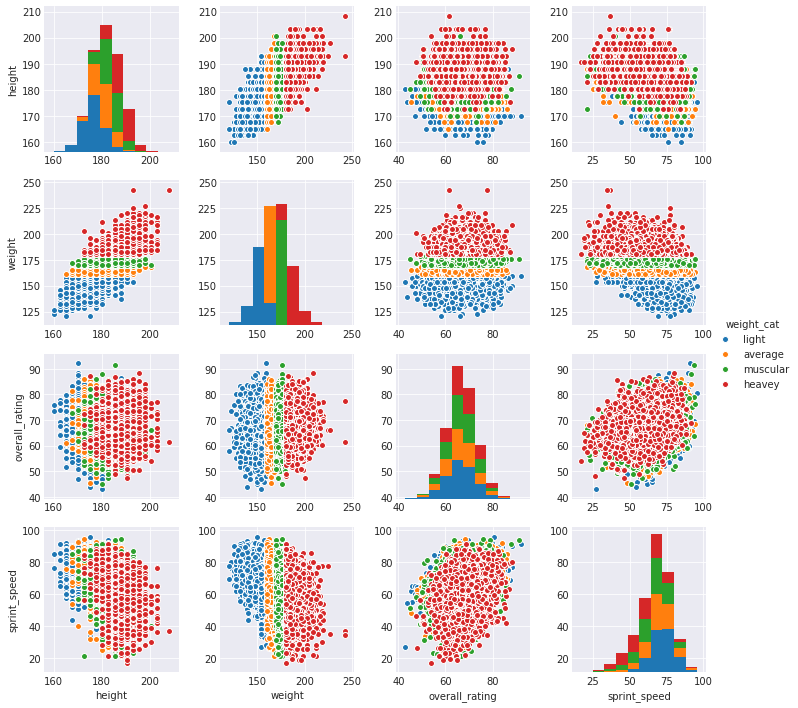

In [34]:
sns.pairplot(players, hue='weight_cat', size=2.5);

>> From this weight category pair plot, we can see that lighter players are shorter, much faster and have higher rating while Heavy players have more average height, are slower and have an average rating.

<a id='conclusions'></a>
## Conclusions

> From my analysis, I found out that players Lionel Messi is the most rated Player
> The top 10 most rated player have an average of 88.8 points and an average height of 177.29cm
> The fastest players that are categorized as bolt have an average overall rating of 71.82 while the slowest have 65.51
> The players in the tallest category have an average of 67.16 while the short players have an average overall rating of 66.67
> Players that are under the heavy cateogory in their weight class have an average overall rating of 67.8 while players in the light category have 66.20
> The fastest player in Europe is Theo Walcott with a speed rating of 95.70⚡

## Verdict
> Based on the analysis above, players have higher overall ratings tend to be taller, faster and sturdy.
> The light weighted and slow players tend to have lower overall rating.

## Problems
> It was really difficult to come up with a kind of plot that will better explain what I had in mind. 
> I had a lot of difficulties in trying to group the players and link them to their individual clubs and also analyze the club's performance based on the players overall rating, but I have very limited and knowledge to do that now. I will definitely come back to this project.

## Bonus Question
> I was going to analyze the clubs performance per match over the years and answer questions like who won the most matches, which team scored the most goal, but i was overwhelmed to too much data and very lttle knowledge to exploit it. I will still try to answer those questions from this data frame in the future.

### Which teams played in England between 2008 to 2016?

> Import the data base using Pandas

In [35]:
df_3 = pd.read_csv('Database_Soccer/Country.csv')
df_4 = pd.read_csv('Database_Soccer/League.csv')
df_5 = pd.read_csv('Database_Soccer/Team.csv')
df_6 = pd.read_csv('Database_Soccer/Match.csv')

# df_3 = pd.read_sql_query("SELECT * FROM Country", con)
# df_4 = pd.read_sql_query("SELECT * FROM League", con)
# df_5 = pd.read_sql_query("SELECT * FROM Team", con)
# df_6 = pd.read_sql_query("SELECT * FROM Match", con)

> Create a copy of the data frames, so I don't make anychanges to the original

In [36]:
country = df_3.copy()
league = df_4.copy()
teams = df_5.copy()
match =  df_6.copy()

> Drop all the unused columns in the data frames

In [37]:
teams.drop(['team_fifa_api_id','team_short_name'], axis=1, inplace=True)
match.drop(['id', 'season', 'stage', 'date',
       'match_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11', 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH',
       'BSD', 'BSA'], axis=1, inplace=True)

> Cleaning, Merging and rearranging the data in the data frame

In [38]:
# Merging League to Match
match_l = pd.merge(match, league, left_on=['league_id'], right_on=['id'])

match_c = pd.merge(match_l, country, left_on=['country_id_x'], right_on=['id'])


# Merging Match to Team to get the home team in every match

match_ht = pd.merge(match_c, teams, left_on=['home_team_api_id'], right_on=['team_api_id'])

# Drop columns in the Match data frame that are no longer needed for the rest of the project

match_d = match_ht.drop(['country_id_x', 'league_id', 'home_team_api_id', 'id_x',
       'country_id_y', 'id_y', 'id', 'team_api_id',],axis=1)

# Renaming the columns in Match Data Frames to a more descriptive name

match_r = match_d.rename({'name_y':'country', 'name_x':'league', 'team_long_name':'club_name'}, axis=1)

#Reorder the columns in Match data frame
euro_teams = match_r[['country','league','club_name']]

> Use query function to select all the row that contain our league name, then grouping them together.

In [48]:
epl_teams = euro_teams.query('league == "England Premier League"')
epl_teams = epl_teams.groupby('club_name', as_index=False)

## English Premier League Teams

In [49]:
epl_teams.head(1)

,country,league,club_name
1728,England,England Premier League,Manchester United
1880,England,England Premier League,Arsenal
2032,England,England Premier League,Sunderland
2184,England,England Premier League,West Ham United
2317,England,England Premier League,Aston Villa
2469,England,England Premier League,Everton
2621,England,England Premier League,Middlesbrough
2640,England,England Premier League,Bolton Wanderers
2716,England,England Premier League,Hull City
2792,England,England Premier League,Chelsea
